In [104]:
# root_dir = "../../outputs/exp1_model_metrics_avg.csv"
root_dir = "../../outputs/exp2_model_metrics_avg.csv"
exp_name = "exp2"

In [105]:
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
import seaborn as sns

In [106]:
if exp_name == "exp1":
    model_info = {
        'XGBoost Regressor': {'color': "dodgerblue", 'marker': "o"},
        'Random Forest': {'color': "tomato", 'marker': "s"},
        'Linear Regression': {'color': "gold", 'marker': "^"},
        'Ada Boost Regressor': {'color': "mediumseagreen", 'marker': "D"},
        'Decision Tree Regressor': {'color': "lightcoral", 'marker': "p"},
        'MLP Regressor': {'color': "mediumorchid", 'marker': "X"},
        'Passive Aggressive (PA)': {'color': "lightpink", 'marker': "s"},
        'K-Neighbors Regressor': {'color': "deepskyblue", 'marker': "^"},
        'Support Vector Regressor (SVR)': {'color': "limegreen", 'marker': "+"},
        'Linear Regression (LR)': {'color': "salmon", 'marker': "P"},
        'LSTM with Attention': {'color': "orchid", 'marker': "*"},
        'GRU': {'color': "slateblue", 'marker': "v"},
        'BI-LSTM': {'color': "darkorange", 'marker': "d"},
        'LSTM': {'color': "lightseagreen", 'marker': "*"},
        'SGD Regressor': {'color': "violet", 'marker': "h"}
    }
else:
    model_info = {
    'XGBoost Regressor': {'color': "dodgerblue", 'marker': "o"},
    'Ada Boost Regressor': {'color': "mediumseagreen", 'marker': "D"},
    'Passive Aggressive (PA)': {'color': "lightpink", 'marker': "s"},
    'SGD Regressor': {'color': "violet", 'marker': "h"},
    'Adaptive Random Forest (ARF)': {'color': "tomato", 'marker': "s"},
    'Hoeffding Adaptive Tree Regressor': {'color': "gold", 'marker': "^"},
    'Hoeffding Tree Regressor': {'color': "skyblue", 'marker': "o"},
    'SRP Regressor': {'color': "deepskyblue", 'marker': "^"},
    'MLP partialfit': {'color': "mediumorchid", 'marker': "X"}
    }

In [107]:
df = pd.read_csv(root_dir,index_col=False)
df

,Model,Window Size,MAE_mean,MAE_std,RMSE_mean,RMSE_std,SMAPE_mean,SMAPE_std,r2_mean,r2_std,MASE_mean,MASE_std,Training Time,Inference Time,Model memory (MB)
0,Adaptive Random Forest (ARF),6,3.427,0.018,9.078,0.023,20.170,0.131,0.909,0.000,0.885,0.005,71.431,31.641,146.031
1,Adaptive Random Forest (ARF),9,3.553,0.038,9.212,0.066,20.291,0.162,0.906,0.001,0.918,0.010,95.346,40.418,184.937
2,Adaptive Random Forest (ARF),12,3.729,0.080,9.429,0.141,20.721,0.204,0.902,0.003,0.963,0.021,99.159,41.007,187.451
3,Adaptive Random Forest (ARF),20,4.193,0.177,9.952,0.256,21.949,0.445,0.891,0.006,1.083,0.046,113.908,42.076,157.025
4,Adaptive Random Forest (ARF),32,5.630,0.765,11.280,0.756,25.978,1.812,0.859,0.019,1.452,0.197,140.108,44.412,93.727
5,Adaptive Random Forest (ARF),64,11.661,0.213,17.159,0.240,38.946,0.481,0.676,0.009,3.011,0.055,153.104,38.984,3.986
6,Hoeffding Adaptive Tree Regressor,6,3.795,0.063,9.340,0.085,21.583,0.420,0.904,0.002,0.981,0.016,4.567,2.575,2.819
7,Hoeffding Adaptive Tree Regressor,9,3.924,0.062,9.454,0.108,22.128,0.311,0.901,0.002,1.014,0.016,5.786,2.886,4.411
8,Hoeffding Adaptive Tree Regressor,12,4.039,0.085,9.610,0.203,22.626,0.624,0.898,0.004,1.043,0.022,7.075,3.185,5.815
9,Hoeffding Adaptive Tree Regressor,20,4.270,0.134,9.679,0.183,23.467,0.609,0.897,0.004,1.102,0.035,10.800,4.007,10.013


In [108]:
df.Model.unique()

array(['Adaptive Random Forest (ARF)',
       'Hoeffding Adaptive Tree Regressor', 'Hoeffding Tree Regressor',
       'Passive Aggressive (PA)', 'SGD Regressor', 'SRP Regressor',
       'XGBoost Regressor'], dtype=object)

In [109]:
df[df.Model=='BI-LSTM']

,Model,Window Size,MAE_mean,MAE_std,RMSE_mean,RMSE_std,SMAPE_mean,SMAPE_std,r2_mean,r2_std,MASE_mean,MASE_std,Training Time,Inference Time,Model memory (MB)


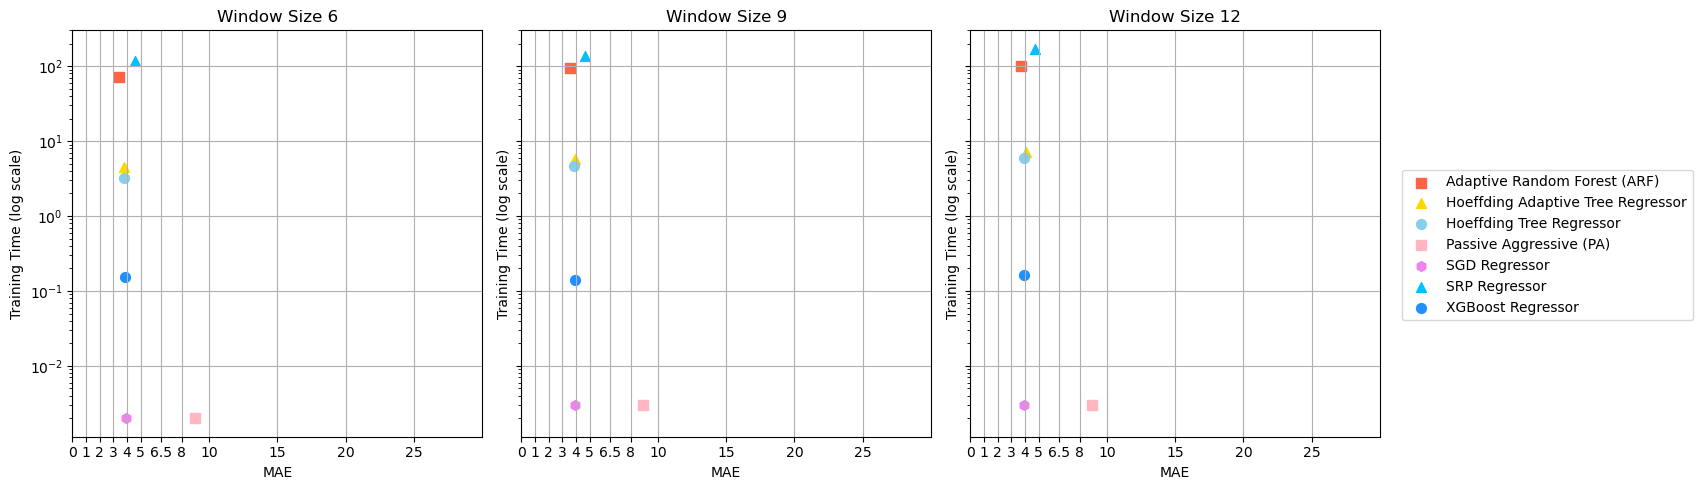

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.legend_handler import HandlerBase

def plot_and_save(df_local, column_name,exp_name):
    fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True) 

    plt.subplots_adjust(hspace=0.5)  

    class MarkerHandler(HandlerBase):
        def create_artists(self, legend, tup, xdescent, ydescent,
                           width, height, fontsize, trans):
            return [tup]

    scatter_handles = {} 

    for i, (col, ax) in enumerate(zip(df_local["Window Size"], axs.flatten())):

        df_temp = df[df['Window Size'] == col].reset_index(drop=True)
        categories = np.random.choice(len(model_info), len(df_temp))
        for index, row in df_temp.iterrows():
            model_info_entry = model_info[row['Model']]
            color = model_info_entry['color']
            marker = model_info_entry['marker']

            handle = ax.scatter(row['MAE_mean'], row[column_name], color=color, marker=marker, label=row['Model'], s=50)
            if i == 0:
                scatter_handles[row['Model']] = handle

        ax.set_title(f"Window Size {col}") 
        ax.set_yscale('log') 
        ax.set_xlabel('MAE')
        ax.set_ylabel(f'{column_name} (log scale)')

        x = [0, 1, 2, 3, 4, 5, 6.5, 8, 10, 15, 20, 25]
        ax.set_xticks(x)
        ax.set_xticklabels(x)
        ax.set_xlim([0, 30])
        ax.grid(True)  

    plt.subplots_adjust(right=0.85) 

    fig.legend(handles=scatter_handles.values(), labels=scatter_handles.keys(), loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, handler_map={plt.scatter: MarkerHandler()})
    plt.tight_layout()
    
    viz_folder = f"images/"
    os.makedirs(viz_folder, exist_ok=True)
    plt.savefig(f"images/{column_name}_plot_{exp_name}.pdf", bbox_inches='tight', dpi=300)  

plot_and_save(df, "Training Time", exp_name)

In [111]:
df.Model.unique()

array(['Adaptive Random Forest (ARF)',
       'Hoeffding Adaptive Tree Regressor', 'Hoeffding Tree Regressor',
       'Passive Aggressive (PA)', 'SGD Regressor', 'SRP Regressor',
       'XGBoost Regressor'], dtype=object)

In [113]:
df.columns

Index(['Model', 'Window Size', 'MAE_mean', 'MAE_std', 'RMSE_mean', 'RMSE_std',
       'SMAPE_mean', 'SMAPE_std', 'r2_mean', 'r2_std', 'MASE_mean', 'MASE_std',
       'Training Time', 'Inference Time', 'Model memory (MB)'],
      dtype='object')

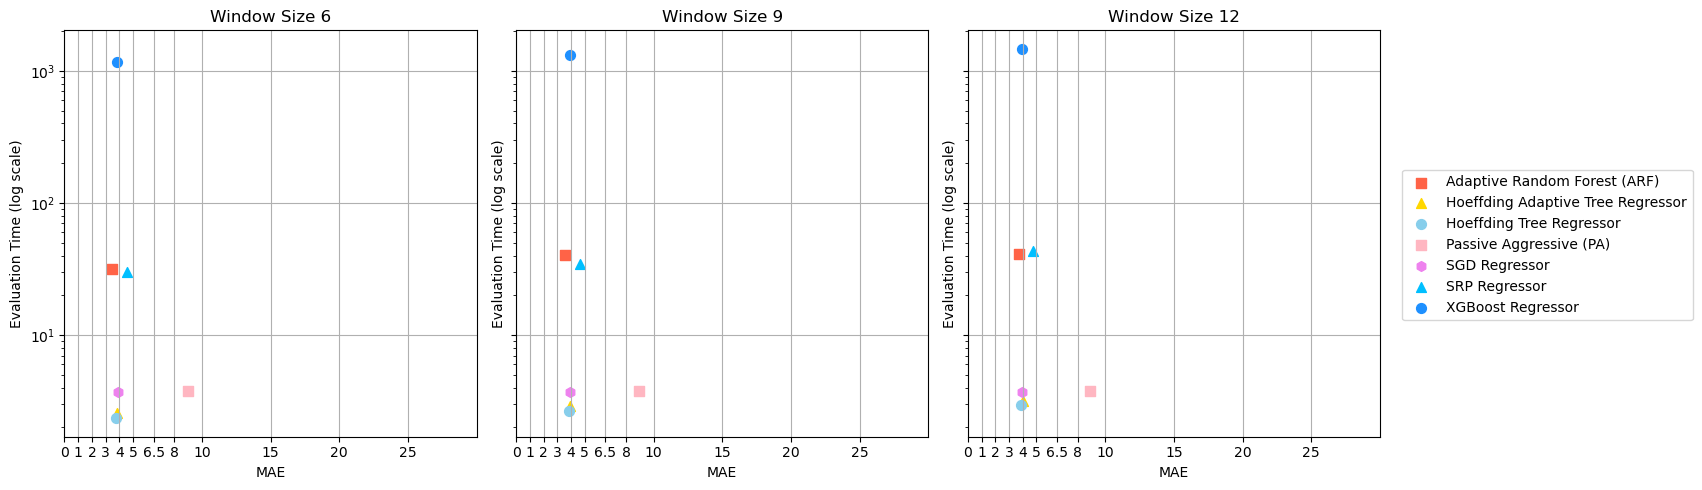

In [114]:
if exp_name == "exp1":
    plot_and_save(df, "Inference Time",exp_name)
elif exp_name == "exp2":
    df.rename(columns={'Inference Time': 'Evaluation Time'}, inplace=True)
    plot_and_save(df, "Evaluation Time",exp_name)

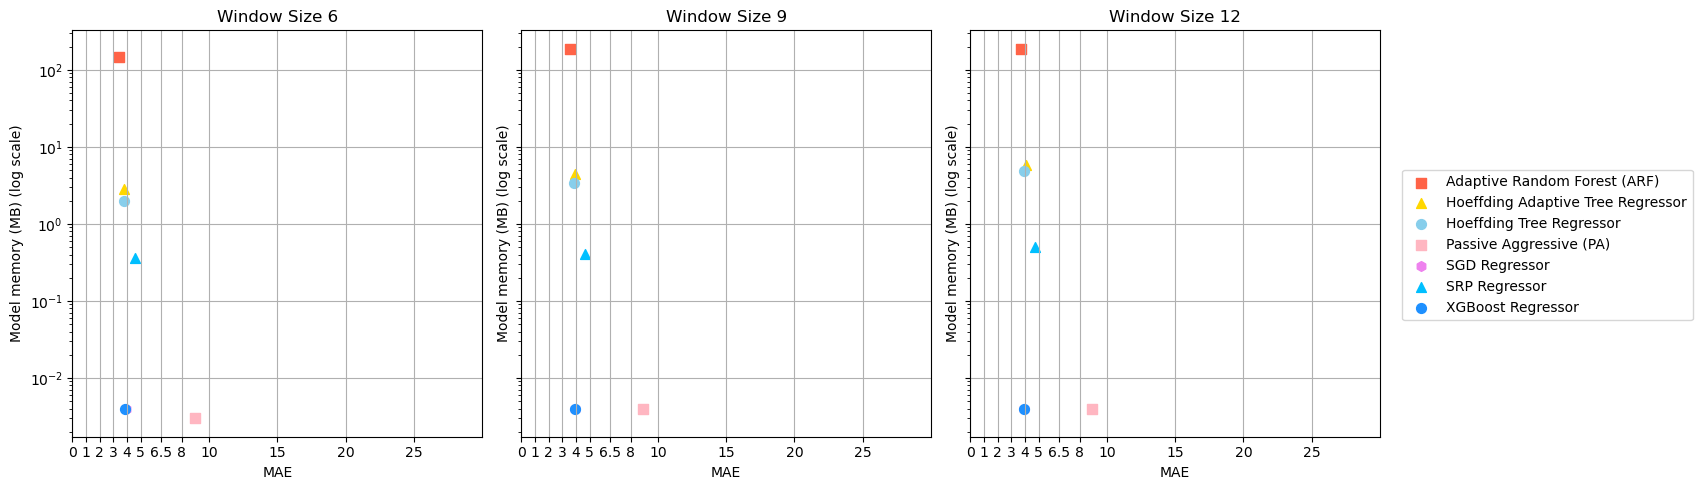

In [115]:
plot_and_save(df, "Model memory (MB)",exp_name)